In [2]:
from cmath import log
import uproot as up
import awkward as ak
import coffea
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema, TreeMakerSchema
from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)
from template.temp_class import ntuplize
import numpy as np
import argparse
import os
import yaml

In [3]:
def list_concatenate(list1,list2):
    new_list = []
    for a in list1:
        new_list.append(a)
    for b in list2:
        new_list.append(b)
    return new_list

Create type 2 hist_plot named "mll".
Create type 2 hist_plot named "mjj".
draw  $W^\pm_T W^\pm_T$
draw  $W^\pm_T W^\pm_L$
draw  $W^\pm_L W^\pm_L$
draw  $W^\pm W^\pm$
draw  $W^\pm_T W^\pm_T$
draw  $W^\pm_T W^\pm_L$
draw  $W^\pm_L W^\pm_L$
draw  $W^\pm W^\pm$


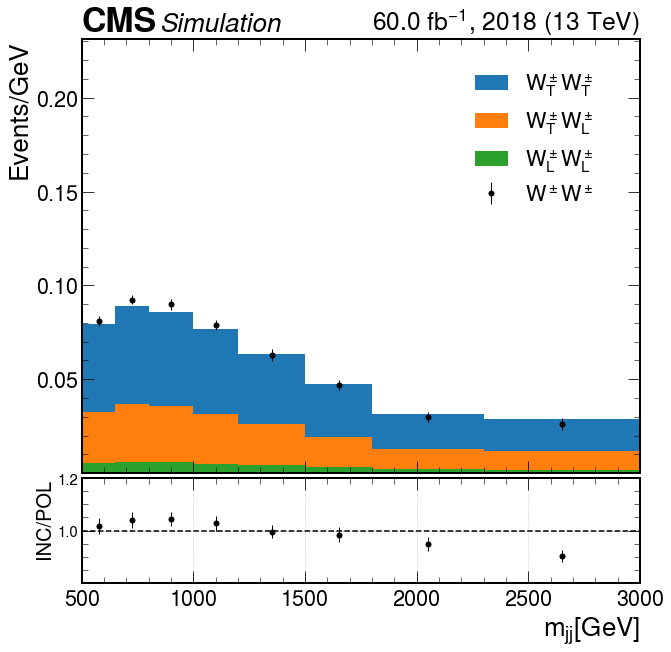

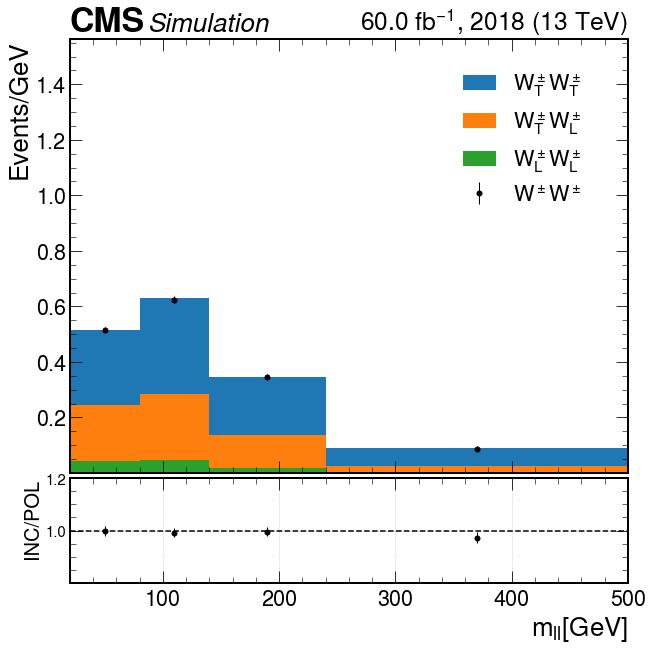

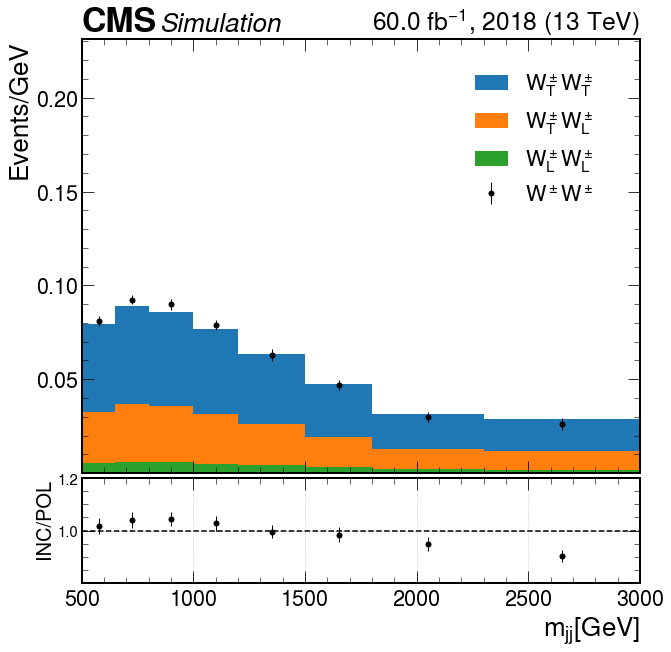

In [4]:
from yty_hist_class import yty_histplot

nanov7_dir = r'/data/pubfs/pku_visitor/public_write/download/datasets/nanov7'
with open(f"/data/pubfs/tyyang99/jupyter_files/changexs_datasets.yaml", 'r') as f:
    mc_yaml = yaml.load(f, Loader=yaml.FullLoader)
with open(f"/data/pubfs/tyyang99/jupyter_files/data_2018_nanov7.yaml", 'r') as f:
    data_yaml = yaml.load(f, Loader=yaml.FullLoader)
    
Lumi = 60.0*1e3
year = '2018'

lepton_type = 'all'#['2e','2mu','1e1mu','all']

default_mll_histbins = [20., 80., 140., 240., 500]
default_mjj_histbins = [500., 650., 800., 1000., 1200., 1500., 1800., 2300., 3000.]
# default_mjj_histbins = [500., 800., 1200., 1800., 3000.]

mll_hist = yty_histplot('mll',2,default_mll_histbins,Figsize=(10,10))
mjj_hist = yty_histplot('mjj',2,default_mjj_histbins,Figsize=(10,10))

divide_processes_label_list = []
processes_label_list = []
nonprompt_label_list_data = []
nonprompt_label_list_mc = []

# for isdata in ['data']:
buffer_out_range_list = []

WW_polar = ['WpWpJJ_LL_polarization_EWK','WpWpJJ_TL_polarization_EWK','WpWpJJ_TT_polarization_EWK','WpWpJJ_EWK']
# WW_polar = ['WpWpJJ_LL_polarization_EWK','WpWpJJ_TL_polarization_EWK','WpWpJJ_TT_polarization_EWK']
# PROCESSES = [WW_merge, WZ_EWK]
legendlist = ['$W^\pm_L W^\pm_L$','$W^\pm_T W^\pm_L$','$W^\pm_T W^\pm_T$','$W^\pm W^\pm$']
# test_merge = [[i] for i in Data_merge]
# legendlist = [i for i in Data_merge]

wrong_sign_label_list = []

_2e_label_list = []
_2mu_label_list = []
_1e1mu_label_list = []

# store_folder = f"{isdata}_ssww_final_output_array"
store_folder = f"coffea_DeepCSVbtag_newHLT_mc_MET_ssww_final_output_array"
# for i,process_list in enumerate(test_merge):

for i,process in enumerate(WW_polar):
    legend = legendlist[i]
    if process=='WpWpJJ_EWK':
        factor = (mc_yaml['WpWpJJ_LL_polarization_EWK']['xs']+mc_yaml['WpWpJJ_TL_polarization_EWK']['xs']+mc_yaml['WpWpJJ_TT_polarization_EWK']['xs'])/mc_yaml['WpWpJJ_EWK']['xs']
#         factor = 1.09
    else:
        factor = 1

    mll_array_list = ak.from_parquet(f"{store_folder}/mll_{process}.parquet")
    mll_array_list = mll_array_list*(mll_array_list<default_mll_histbins[-1])+(default_mll_histbins[-1]+default_mll_histbins[-2])/2*(mll_array_list>=default_mll_histbins[-1])
    mll_weight_list = factor*ak.from_parquet(f"{store_folder}/mll_weight_{process}.parquet")
    mjj_array_list = ak.from_parquet(f"{store_folder}/mjj_{process}.parquet")
    mjj_array_list = mjj_array_list*(mjj_array_list<default_mjj_histbins[-1])+(default_mjj_histbins[-1]+default_mjj_histbins[-2])/2*(mjj_array_list>=default_mjj_histbins[-1])
    mjj_weight_list = factor*ak.from_parquet(f"{store_folder}/mjj_weight_{process}.parquet")

    if lepton_type in ['2e','2mu','1e1mu']:
        tight_2l_sel = ak.from_parquet(f"{store_folder}/ss_{lepton_type}_{process}.parquet")==1
    else:
        tight_2l_sel = ak.ones_like(mll_array_list)==1

    mll_array_list = mll_array_list[tight_2l_sel]
    mjj_array_list = mjj_array_list[tight_2l_sel]

    mll_hist.append_values(legend,[mll_array_list])
    mll_weight_list = mll_weight_list[tight_2l_sel]
    mll_hist.append_weights(legend,[mll_weight_list])
    
    mjj_hist.append_values(legend,[mjj_array_list])
    mjj_weight_list = mjj_weight_list[tight_2l_sel]
    mjj_hist.append_weights(legend,[mjj_weight_list])






mll_hist.set_legend(legendbool=True,ncol=1)
mll_hist.set_autoylim(2.5)
mll_hist.set_title(Lumi=60.0, Year=2018, xlabel='$m_{ll}[GeV]$', y1label='Events/GeV', y2label='INC/POL',title='',cmstitle=True)
mll_hist.draw(legendlist[:-1][:],histtype_list = ['fill']*len(legendlist[:-1][:]),stack=True)
mll_hist.draw(legendlist[-1],histtype_list = ['errorbar'],color_list = ['black'])
mll_hist.compare('$W^\pm W^\pm$','$W^\pm_T W^\pm_T$',stack2=True,ylim=[0.8,1.2])
mjj_hist.set_legend(legendbool=True,ncol=1)
mjj_hist.set_autoylim(2.5)
mjj_hist.set_title(Lumi=60.0, Year=2018, xlabel='$m_{jj}[GeV]$', y1label='Events/GeV', y2label='INC/POL',title='',cmstitle=True)
mjj_hist.draw(legendlist[:-1][:],histtype_list = ['fill']*len(legendlist[:-1][:]),stack=True)
mjj_hist.draw(legendlist[-1],histtype_list = ['errorbar'],color_list = ['black'])
mjj_hist.compare('$W^\pm W^\pm$','$W^\pm_T W^\pm_T$',stack2=True,ylim=[0.8,1.2])

In [20]:
legendlist[-1]

'$W^\\pm W^\\pm$'

In [16]:
(mc_yaml['WpWpJJ_LL_polarization_EWK']['xs']+mc_yaml['WpWpJJ_TL_polarization_EWK']['xs']+mc_yaml['WpWpJJ_TT_polarization_EWK']['xs'])/mc_yaml['WpWpJJ_EWK']['xs']

1.0906430496726993

In [24]:
mll_weight_list
mjj_weight_list

<Array [0.000478, 0.000482, ... 0.000479] type='155934 * ?float32'>